# Part 2 Data Bias Results

This file includes the results from binary classification for gender, skin tone, age and anatomical skin lesion location. 

The metrics included, balanced accuracy, F1, precision and recall. 

Statistical testing including Spearmans rank correlation and Chi-squared testing was also used alongside graphical representation of results. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use('ggplot')

import numpy
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score, precision_recall_fscore_support
)
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np
from pandas.core.frame import DataFrame

In [ ]:
model_test_results = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/skin_lesion_part_2_models/2022-06-24_11-37-26.394018/each_image_predictions.csv')
model_test_results

# need to make a new colum with image id, by splitting on '/' and then taking the id and strip off the .jpg

,Unnamed: 0,predicted,actual,image_path
0,0,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
3,3,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
4,4,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
...,...,...,...,...
2529,2529,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2530,2530,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2531,2531,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2532,2532,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...


In [ ]:
model_test_results["image_id"] = [None]*len(model_test_results)
for index, row in model_test_results.iterrows():
    image_path = row.image_path
    image_id = image_path.split("/")[-1].split(".")[0]
    model_test_results.loc[model_test_results["image_path"] == image_path, 'image'] = image_id

model_test_results

,Unnamed: 0,predicted,actual,image_path,image_id,image
0,0,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000004
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000159
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000160
3,3,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000167
4,4,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000173
...,...,...,...,...,...,...
2529,2529,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073128
2530,2530,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073146
2531,2531,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073155
2532,2532,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073199


In [ ]:
total_meta_data = pd.read_csv("/content/drive/MyDrive/Dissertation/skin_lesion_data/mel_vs_nonmel.csv")

grouped_by_set = total_meta_data.groupby("rand_split")
test_metadata = grouped_by_set.get_group("test")

test_metadata


,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class,age_group
3,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NON_MEL,21-40
4,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL,>60
15,ISIC_0000016,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,58.896179,NON_MEL,41-60
31,ISIC_0000032_downsampled,30.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,29.356628,NON_MEL,21-40
36,ISIC_0000038_downsampled,40.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,31.350281,NON_MEL,21-40
...,...,...,...,...,...,...,...,...,...,...,...
25268,ISIC_0073155,85.0,anterior torso,BCN_0001306,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,3.0,22.387878,NON_MEL,>60
25279,ISIC_0073173,80.0,palms/soles,BCN_0002989,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,24.988464,MEL,>60
25292,ISIC_0073199,45.0,palms/soles,BCN_0000077,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,40.690613,NON_MEL,41-60
25310,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,14.193542,NON_MEL,>60


In [ ]:
grouped_by_fitz = total_meta_data.groupby("fitzpatrick")
six_fitz = grouped_by_fitz.get_group(6.0)
six_fitz


,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class,age_group
0,ISIC_0000000,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,34.572449,NON_MEL,41-60
1,ISIC_0000001,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,44.077820,NON_MEL,21-40
2,ISIC_0000002,60.0,upper extremity,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,val,6.0,33.744324,MEL,41-60
6,ISIC_0000007,25.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,val,6.0,40.841492,NON_MEL,21-40
9,ISIC_0000010,35.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,41.458191,NON_MEL,21-40
...,...,...,...,...,...,...,...,...,...,...,...
25170,ISIC_0073008,40.0,anterior torso,BCN_0003754,male,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,23.847839,NON_MEL,21-40
25190,ISIC_0073035,60.0,head/neck,BCN_0001700,male,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,32.646179,NON_MEL,41-60
25238,ISIC_0073112,85.0,anterior torso,BCN_0004089,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,37.407898,NON_MEL,>60
25275,ISIC_0073169,55.0,upper extremity,BCN_0005658,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,22.023132,NON_MEL,41-60


In [ ]:
age_na = test_metadata["age_approx"].isna().sum()
print("Number of na in age is ", age_na)

sex_na = test_metadata["sex"].isna().sum()
print("Number of na in sex is ", sex_na)

location_na = test_metadata["anatom_site_general"].isna().sum()
print("Number of na in location is ", location_na)

Number of na in age is  48
Number of na in sex is  42
Number of na in location is  276


In [ ]:
# make new table of test metadata plus this test results 

test_results_metadata = pd.merge(test_metadata, model_test_results, on='image')
test_results_metadata = test_results_metadata.drop(columns="Unnamed: 0")
test_results_metadata

# len(test_results_metadata)

,image,age_approx,anatom_site_general,lesion_id,sex,image_path_x,rand_split,fitzpatrick,brisque,class,age_group,predicted,actual,image_path_y,image_id
0,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NON_MEL,21-40,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
1,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL,>60,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2,ISIC_0000016,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,58.896179,NON_MEL,41-60,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
3,ISIC_0000032_downsampled,30.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,29.356628,NON_MEL,21-40,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
4,ISIC_0000038_downsampled,40.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,31.350281,NON_MEL,21-40,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,ISIC_0073155,85.0,anterior torso,BCN_0001306,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,3.0,22.387878,NON_MEL,>60,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2530,ISIC_0073173,80.0,palms/soles,BCN_0002989,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,24.988464,MEL,>60,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2531,ISIC_0073199,45.0,palms/soles,BCN_0000077,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,40.690613,NON_MEL,41-60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2532,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,14.193542,NON_MEL,>60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None


# Gender

In [ ]:

# precision_recall_fscore_support where suport = None in our case as we are doing average 
gender_report = []
gender_bal_acc = []

genders = ["male", "female"]

for gender in genders:
    df = (test_results_metadata.loc[test_results_metadata["sex"] == gender])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    gender_bal_acc.append(bal_acc)

print(gender_bal_acc)


for gender in genders:
    df = (test_results_metadata.loc[test_results_metadata["sex"] == gender])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    gender_report.append(metric_report)

print(gender_report)

[0.7568540089486304, 0.7587267080745341]
[(0.6889388826396701, 0.7568540089486304, 0.7072561492924253, None), (0.6818572093835497, 0.7587267080745341, 0.7013118994826313, None)]


## Balanced Accuracy : Gender

Text(0, 0.5, 'Balanced Accuracy')

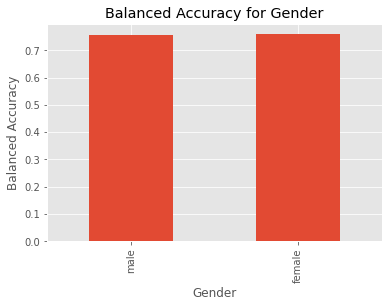

In [ ]:
bal_acc_combo = list(zip(genders, gender_bal_acc))
df = pd.DataFrame(bal_acc_combo, columns = ['gender', 'balanced_accuracy'])

df.plot(
    x="gender", y="balanced_accuracy", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Gender")
plt.xlabel("Gender")
plt.ylabel("Balanced Accuracy")

## F1 score: Gender

Text(0, 0.5, 'F1 score')

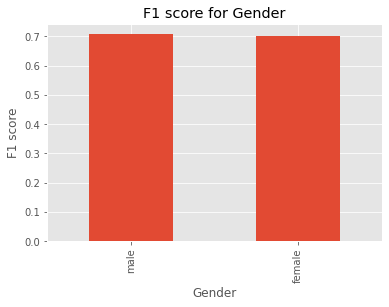

In [ ]:
gender_f1 = []
for ind_list in gender_report:
    gender_f1.append(ind_list[2])

# type(genders)
f1_combo = list(zip(genders, gender_f1))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_f1'])

df.plot(
    x="gender", y="gender_f1", kind="bar", legend=False
)
plt.title("F1 score for Gender")
plt.xlabel("Gender")
plt.ylabel("F1 score")

## Precision: Gender

Text(0, 0.5, 'Precision')

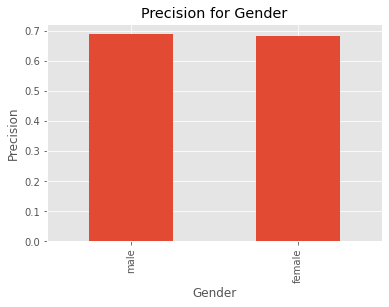

In [ ]:
gender_precision = []
for ind_list in gender_report:
    gender_precision.append(ind_list[0])

# type(genders)
f1_combo = list(zip(genders, gender_precision))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_precision'])

df.plot(
    x="gender", y="gender_precision", kind="bar", legend=False
)
plt.title("Precision for Gender")
plt.xlabel("Gender")
plt.ylabel("Precision")

## Recall: Gender

Text(0, 0.5, 'Recall')

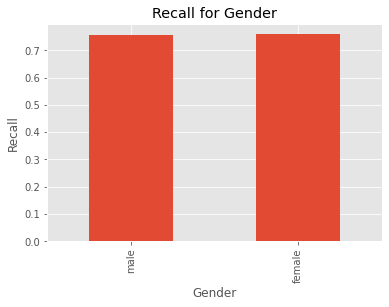

In [ ]:
gender_recall = []
for ind_list in gender_report:
    gender_recall.append(ind_list[1])

# type(genders)
f1_combo = list(zip(genders, gender_recall))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_recall'])

df.plot(
    x="gender", y="gender_recall", kind="bar", legend=False
)
plt.title("Recall for Gender")
plt.xlabel("Gender")
plt.ylabel("Recall")

## Summary of metrics: Gender

In [ ]:
# to test whether there is a relationship between number of the variable in the training set and the final metric score 

total_meta_data = pd.read_csv("/content/drive/MyDrive/Dissertation/skin_lesion_data/mel_vs_nonmel.csv")

grouped_by_set = total_meta_data.groupby("rand_split")
train_metadata = grouped_by_set.get_group("train")

train_metadata

,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class,age_group
0,ISIC_0000000,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,34.572449,NON_MEL,41-60
1,ISIC_0000001,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,44.077820,NON_MEL,21-40
5,ISIC_0000006,25.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,5.0,35.817566,NON_MEL,21-40
7,ISIC_0000008,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,43.250671,NON_MEL,21-40
8,ISIC_0000009,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,39.956726,NON_MEL,21-40
...,...,...,...,...,...,...,...,...,...,...,...
25324,ISIC_0073245,45.0,upper extremity,BCN_0003359,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,19.272644,NON_MEL,41-60
25325,ISIC_0073246,80.0,anterior torso,BCN_0005265,male,/content/drive/MyDrive/Dissertation/skin_lesio...,train,4.0,30.052917,NON_MEL,>60
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,43.043640,NON_MEL,>60
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,37.097351,NON_MEL,>60


In [ ]:
sex_count = list(train_metadata["sex"].value_counts())
sex_count

# gender_bal_acc_correl = stats.spearmanr(sex_count, gender_bal_acc)
# print("The SRCC for balanced accuracy vs gender count is ", gender_bal_acc_correl)
# print("gender bal acc", gender_bal_acc)

# gender_f1_correl = stats.spearmanr(sex_count, gender_f1)
# print("The SRCC for f1 score vs gender count is ", gender_f1_correl)
# print("gender f1", gender_f1)

# gender_precision_correl = stats.spearmanr(sex_count, gender_precision)
# print("The SRCC for precision vs gender count is ", gender_precision_correl)
# print("gender precision ", gender_precision)

# gender_recall_correl = stats.spearmanr(sex_count, gender_recall)
# print("The SRCC for recall vs gender count is ", gender_recall_correl)
# print("gender recall ", gender_recall)

# gender_srcc = [gender_bal_acc_correl, gender_f1_correl, gender_precision_correl, gender_recall_correl]
# gender_array = np.array(gender_srcc)
# gender_table = DataFrame(gender_array, index = ["BA", "F1", "P", "R"], columns=["SRCC", "p-value"])
# print(gender_table)

gender_scores = [gender_bal_acc, gender_f1, gender_precision, gender_recall]
score_array = np.array(gender_scores)
score_array = np.transpose(score_array)
gender_count_scores = DataFrame(score_array, index = genders, columns = ["BA", "F1", "P", "R"])
gender_count_scores
gender_count_scores['train_images_count'] = np.array(sex_count)

print(gender_count_scores)

# lets come back to this as the p-value maybe NAN as there is only two varaiables and may need a different metric...https://stackoverflow.com/questions/59002624/why-i-get-nan-in-spearman-correlation-in-python
# this partially may suggest that there is too little variance in the values so to do with the maths behind SRCC it doesnt really work


              BA        F1         P         R  train_images_count
male    0.756854  0.707256  0.688939  0.756854               10642
female  0.758727  0.701312  0.681857  0.758727                9319


## Chi sqaured test: Gender

In [ ]:
# to make an extra "correct" column to calc correct (1) or incorrect (0)

gender_total_data_meta = test_results_metadata
conditions = [
              (gender_total_data_meta['actual'] == gender_total_data_meta['predicted']),
              (gender_total_data_meta['actual'] != gender_total_data_meta['predicted'])
]

values = [1, 0]

gender_total_data_meta['correct'] = np.select(conditions, values, default=None)

gender_total_data_meta

# gender_total_data_meta.to_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/chi_squ_metadata_all_train_data.csv', index=False)

In [ ]:
gender_total_data_meta = gender_total_data_meta.groupby(["sex", "correct"])["sex"].count()
gender_total_data_meta.to_frame()
print(gender_total_data_meta)

tab_data = [[280, 1046], [244, 922]]
chi2_contingency(tab_data)

sex     correct
female  0           244
        1           922
male    0           280
        1          1046
Name: sex, dtype: int64


(0.004463987724263318,
 0.9467305099559411,
 1,
 array([[ 278.82182986, 1047.17817014],
        [ 245.17817014,  920.82182986]]))

# Skin Tone

In [ ]:
skin_tone_report = []
skin_tone_bal_acc = []

skin_tones = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

for tone in skin_tones:
    df = (test_results_metadata.loc[test_results_metadata["fitzpatrick"] == tone])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    skin_tone_bal_acc.append(bal_acc)

print(skin_tone_bal_acc)


for tone in skin_tones:
    df = (test_results_metadata.loc[test_results_metadata["fitzpatrick"] == tone])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    skin_tone_report.append(metric_report)

print(skin_tone_report)

[0.762440288580621, 0.7331879316612141, 0.6782805429864254, 0.7051282051282051, 0.6041666666666666, 0.7485915492957746]
[(0.6940323453856412, 0.762440288580621, 0.7116569735666713, None), (0.6633562515915457, 0.7331879316612141, 0.6847407407407408, None), (0.5965686274509804, 0.6782805429864254, 0.5978112175102599, None), (0.5666666666666667, 0.7051282051282051, 0.553623188405797, None), (0.6041666666666666, 0.6041666666666666, 0.6041666666666666, None), (0.6697115384615384, 0.7485915492957746, 0.6945701357466063, None)]


## Balanced Accuracy: Skin Tone

Text(0, 0.5, 'Balanced Accuracy')

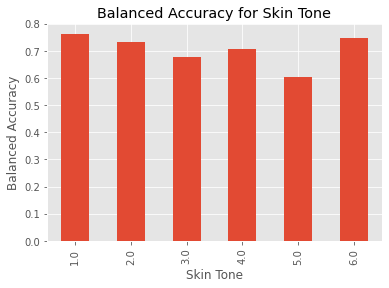

In [ ]:
skin_tone_chart = list(zip(skin_tones, skin_tone_bal_acc))
df = pd.DataFrame(skin_tone_chart, columns = ['skin_tones', 'skin_tone_bal_acc'])

df.plot(
    x="skin_tones", y="skin_tone_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Skin Tone")
plt.xlabel("Skin Tone")
plt.ylabel("Balanced Accuracy")

## F1 score: Skin Tone

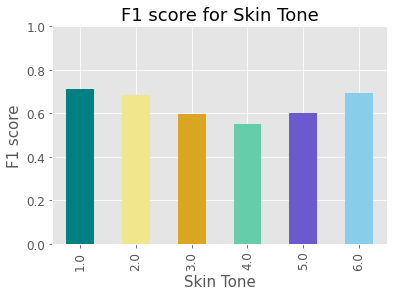

In [ ]:
skin_tone_f1 = []
for ind_list in skin_tone_report:
    skin_tone_f1.append(ind_list[2])


f1_skin_combo = list(zip(skin_tones, skin_tone_f1))

df = pd.DataFrame(f1_skin_combo, columns = ['skin_tones', 'skin_tone_f1'])

df.plot(
    x="skin_tones", y="skin_tone_f1", ylim=(0,1), kind="bar", color=["teal", "khaki", "goldenrod", "mediumaquamarine", "slateblue", "skyblue", "indianred", "darksalmon"], legend=False
)
plt.title("F1 score for Skin Tone", fontsize=18)
plt.xlabel("Skin Tone", fontsize=15)
plt.ylabel("F1 score", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

## Precision: Skin Tone

Text(0, 0.5, 'Precision')

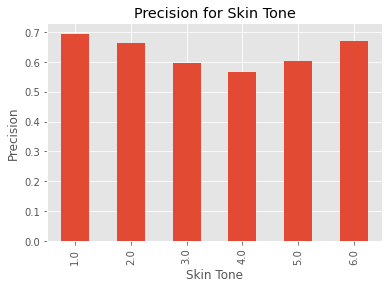

In [ ]:
skin_tone_precision = []
for ind_list in skin_tone_report:
    skin_tone_precision.append(ind_list[0])

# type(genders)
precision_tone_combo = list(zip(skin_tones, skin_tone_precision))

df = pd.DataFrame(precision_tone_combo, columns = ['skin_tones', 'skin_tone_precision'])

df.plot(
    x="skin_tones", y="skin_tone_precision", kind="bar", legend=False
)
plt.title("Precision for Skin Tone")
plt.xlabel("Skin Tone")
plt.ylabel("Precision")

## Recall: Skin Tone

Text(0, 0.5, 'Recall')

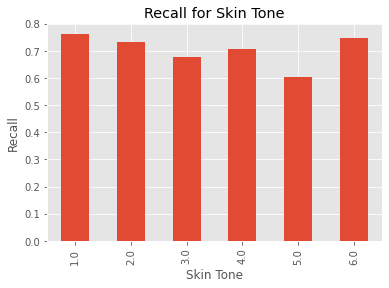

In [ ]:
skin_tone_recall = []
for ind_list in skin_tone_report:
    skin_tone_recall.append(ind_list[1])

# type(skin_tones)
recall_skin_tone_combo = list(zip(skin_tones, skin_tone_recall))

df = pd.DataFrame(recall_skin_tone_combo, columns = ['skin_tones', 'skin_tone_recall'])

df.plot(
    x="skin_tones", y="skin_tone_recall", kind="bar", legend=False
)
plt.title("Recall for Skin Tone")
plt.xlabel("Skin Tone")
plt.ylabel("Recall")

## Spearman's rank correlation coefficient: Skin Tone

In [ ]:
tone_count = train_metadata["fitzpatrick"].value_counts()
tone_count = list(tone_count.sort_index().values)

bal_acc_correl = stats.spearmanr(tone_count, skin_tone_bal_acc)
print("The SRCC for balanced accuracy vs skin tone count is ", bal_acc_correl)

f1_correl = stats.spearmanr(tone_count, skin_tone_f1)
print("The SRCC for f1 score vs skin tone count is ", f1_correl)

precision_correl = stats.spearmanr(tone_count, skin_tone_precision)
print("The SRCC for precision vs skin tone count is ", precision_correl)

recall_correl = stats.spearmanr(tone_count, skin_tone_recall)
print("The SRCC for recall vs skin tone count is ", recall_correl)

tone_srcc = [bal_acc_correl, f1_correl, precision_correl, recall_correl]
tone_array = np.array(tone_srcc)
tone_table = DataFrame(tone_array, index = ["BA", "F1", "P", "R"], columns=["SRCC", "p-value"])
print(tone_table)

tone_scores = [skin_tone_bal_acc, skin_tone_f1, skin_tone_precision, skin_tone_recall]
score_array = np.array(tone_scores)
score_array = np.transpose(score_array)
tone_count_scores = DataFrame(score_array, index = skin_tones, columns = ["BA", "F1", "P", "R"])
tone_count_scores
tone_count_scores['count'] = np.array(tone_count)

tone_count_scores['skin_tone'] = tone_count_scores.index
print(tone_count_scores)


The SRCC for balanced accuracy vs skin tone count is  SpearmanrResult(correlation=0.942857142857143, pvalue=0.004804664723032055)
The SRCC for f1 score vs skin tone count is  SpearmanrResult(correlation=0.8285714285714287, pvalue=0.04156268221574334)
The SRCC for precision vs skin tone count is  SpearmanrResult(correlation=0.8285714285714287, pvalue=0.04156268221574334)
The SRCC for recall vs skin tone count is  SpearmanrResult(correlation=0.942857142857143, pvalue=0.004804664723032055)
        SRCC   p-value
BA  0.942857  0.004805
F1  0.828571  0.041563
P   0.828571  0.041563
R   0.942857  0.004805
           BA        F1         P         R  count  skin_tone
1.0  0.762440  0.711657  0.694032  0.762440  16006        1.0
2.0  0.733188  0.684741  0.663356  0.733188   1218        2.0
3.0  0.678281  0.597811  0.596569  0.678281    671        3.0
4.0  0.705128  0.553623  0.566667  0.705128    273        4.0
5.0  0.604167  0.604167  0.604167  0.604167    190        5.0
6.0  0.748592  0.6945

In [ ]:
tone_count_scores["F1"]

1.0    0.711657
2.0    0.684741
3.0    0.597811
4.0    0.553623
5.0    0.604167
6.0    0.694570
Name: F1, dtype: float64

In [ ]:
tone_count_scores["skin_tone"] = [1,2,3,4,5,6]

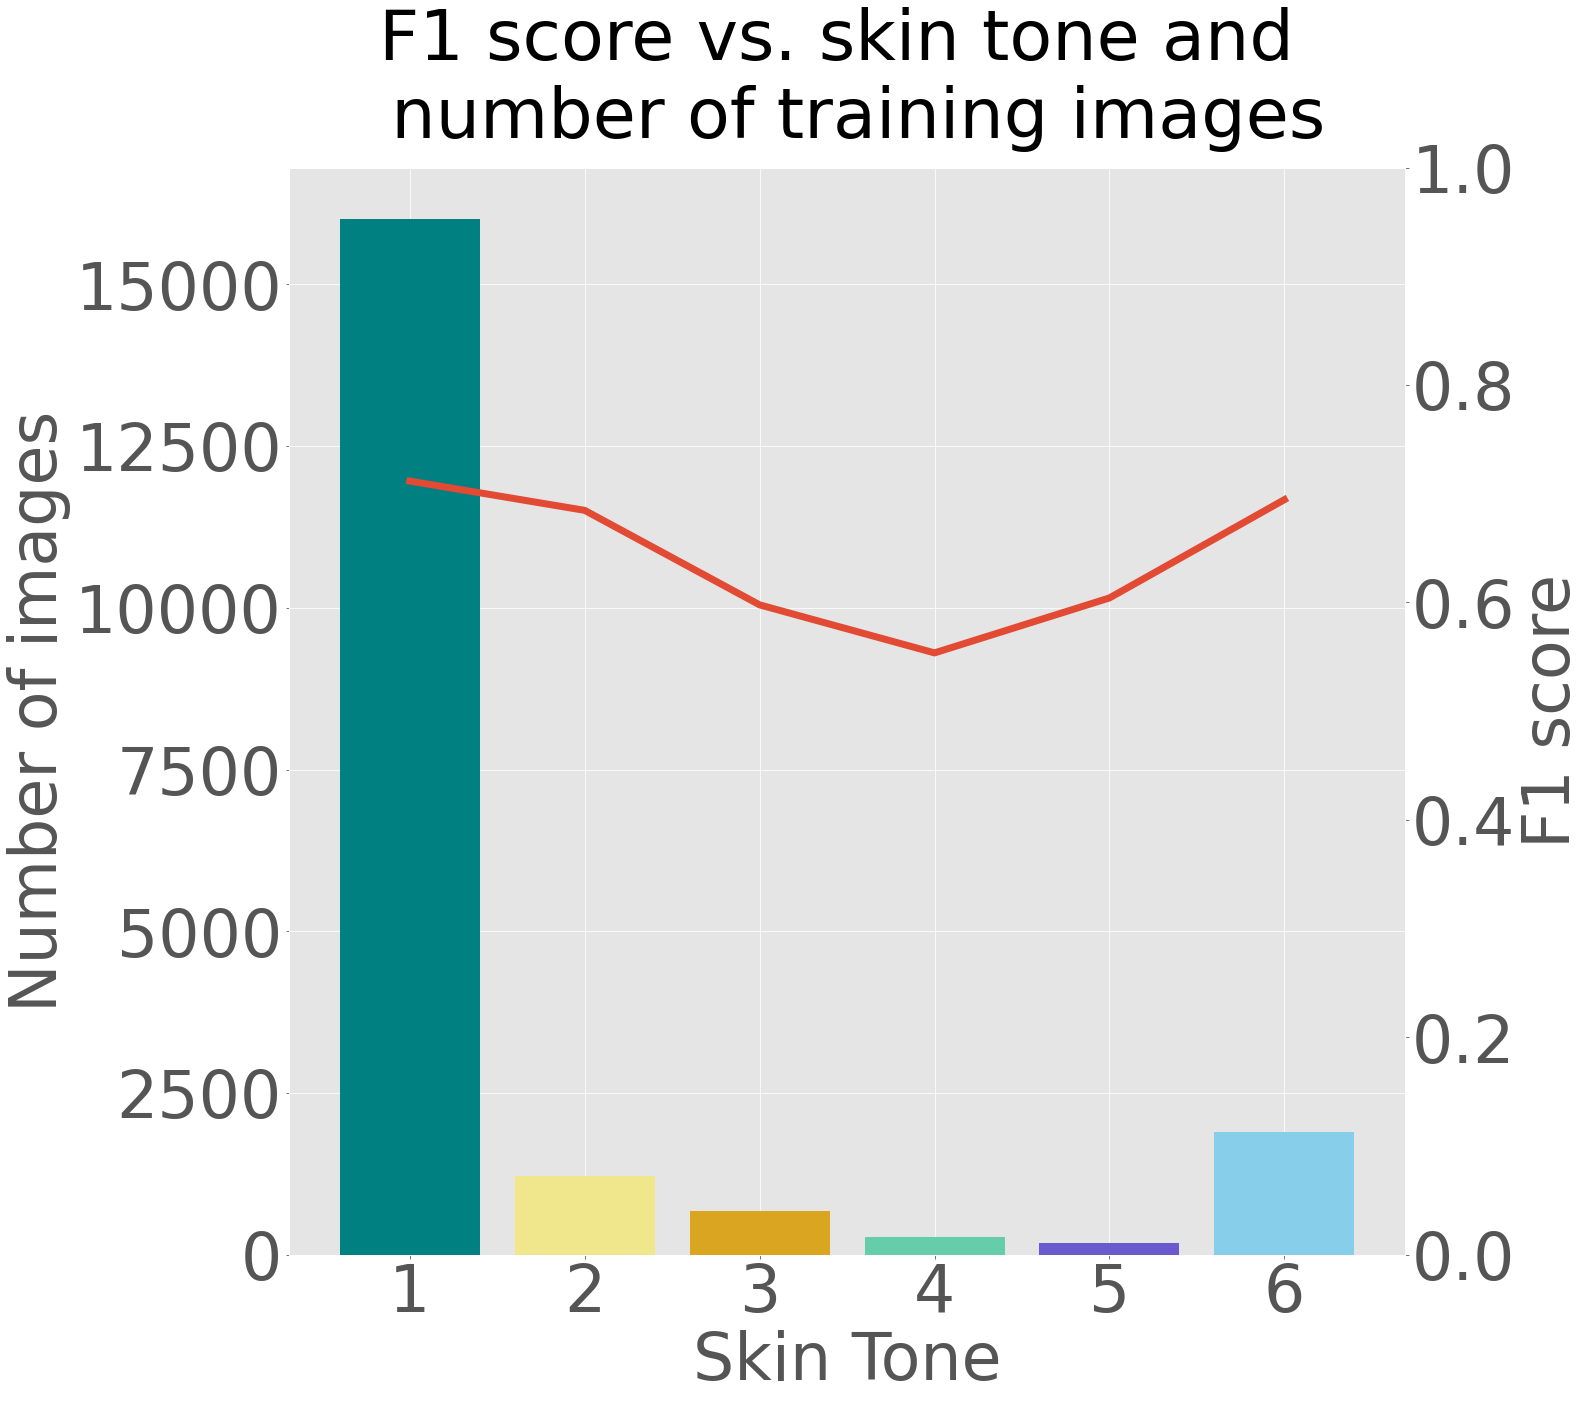

In [ ]:
# tone_count_df = pd.DataFrame(tone_count, index = skin_tones, columns=["count"])
# tone_count_df['skin_tone'] = tone_count_df.index

# ax = tone_count_df.plot(x='skin_tone', y='count', color=["teal", "khaki", "goldenrod", "mediumaquamarine", "slateblue", "skyblue", "indianred", "darksalmon"], kind="bar", legend=False)
# # plt.plot(tone_count_df.skin_tone.values, tone_count_df["count"].values, color=tone_count_df.skin_tone.values)
# ax2 = tone_count_scores["F1"].plot(secondary_y=True)

# plt.title("No. of training images by Skin Tone", fontsize=18)
# ax.set_xlabel("Skin Tone", fontsize=15)
# ax.set_ylabel("Number of images", fontsize=15)
# ax2.set_ylabel("F1 score", fontsize=15)
# ax2.set_ylim(0,1.0)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.tick_params(axis='both', which='minor', labelsize=12)

# ax = tone_count_scores["count"].plot(x='index', color=["teal", "khaki", "goldenrod", "mediumaquamarine", "slateblue", "skyblue"], kind="bar", legend=False, figsize=(10,10))
# # plt.plot(tone_count_df.skin_tone.values, tone_count_df["count"].values, color=tone_count_df.skin_tone.values)
# ax2 = tone_count_scores["F1"].plot(secondary_y=True, x="skin_tone", y="F1", kind="line")
# # tone_count_scores.plot(y="F1", x="skin_tone")

# plt.title("No. of training images by Skin Tone", fontsize=18)
# ax.set_xlabel("Skin Tone", fontsize=15)
# ax.set_ylabel("Number of images", fontsize=15)
# ax2.set_ylabel("F1 score", fontsize=15)
# ax2.set_ylim(0,1.0)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.tick_params(axis='both', which='minor', labelsize=12)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.bar(x=tone_count_scores.skin_tone, height=tone_count_scores["count"], color=["teal", "khaki", "goldenrod", "mediumaquamarine", "slateblue", "skyblue"])
ax2 = ax.twinx()
ax2.plot(tone_count_scores.skin_tone, tone_count_scores.F1, linewidth=7)
ax.set_title("F1 score vs. skin tone and \n number of training images", fontsize=70, pad=30)
ax.set_xlabel("Skin Tone", fontsize=65)
ax.set_ylabel("Number of images", fontsize=65)
ax.set_xticks(tone_count_scores.skin_tone)
ax2.set_ylabel("F1 score", fontsize=65)
ax2.set_ylim(0,1.0)
ax.tick_params(axis='both', which='major', labelsize=65)
ax.tick_params(axis='both', which='minor', labelsize=65)
ax2.tick_params(axis='both', which='major', labelsize=65)
ax2.tick_params(axis='both', which='minor', labelsize=65)
ax2.grid(None)

In [ ]:
age_count_df = pd.DataFrame(age_count, index = ages, columns=["count"])
age_count_df['ages'] = age_count_df.index

ax = age_count_df.plot(x='ages', y='count', color=["teal", "darksalmon", "skyblue","goldenrod"], kind="bar", legend=False)
# plt.plot(age_count_df.skin_age.values, age_count_df["count"].values, color=age_count_df.skin_age.values)
ax2 = age_count_scores["F1"].plot(secondary_y=True)

plt.title("No. of training images by Age", fontsize=18)
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Number of images", fontsize=15)
ax2.set_ylabel("F1 score", fontsize=15)
ax2.set_ylim(0,1.0)
ax.set_ylim(top=8000)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

# Age 

In [ ]:
# ages = test_results_metadata["age_group"].unique()

ages = ['0-20','21-40', '41-60', '>60']

print(ages)
age_report = []
age_bal_acc = []

for age in ages:
    df = (test_results_metadata.loc[test_results_metadata["age_group"] == age])
    bal_acc = balanced_accuracy_score(df['actual'], df['predicted'])
    age_bal_acc.append(bal_acc)

print(age_bal_acc)


for age in ages:
    df = (test_results_metadata.loc[test_results_metadata["age_group"] == age])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    age_report.append(metric_report)


print(age_report)

['0-20', '21-40', '41-60', '>60']
[0.661504424778761, 0.695915009300329, 0.7753936234781678, 0.7584565975975048]
[(0.5349282296650718, 0.661504424778761, 0.5240384615384615, None), (0.5992012461284889, 0.695915009300329, 0.6088657105606258, None), (0.7053729515289482, 0.7753936234781678, 0.7282851915004503, None), (0.7140694057947291, 0.7584565975975048, 0.7254010270161931, None)]


## Balanced Accurary: Age



Text(0, 0.5, 'Balanced Accuracy')

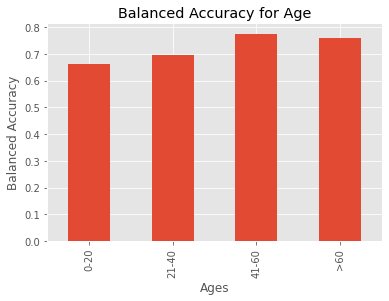

In [ ]:
age_chart = list(zip(ages, age_bal_acc))
df = pd.DataFrame(age_chart, columns = ['ages', 'age_bal_acc'])

df.plot(
    x="ages", y="age_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Age")
plt.xlabel("Ages")
plt.ylabel("Balanced Accuracy")

## F1 score: Age

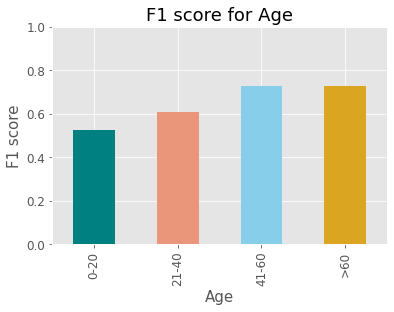

In [ ]:
age_f1 = []
for ind_list in age_report:
    age_f1.append(ind_list[2])

f1_age_combo = list(zip(ages, age_f1))

df = pd.DataFrame(f1_age_combo, columns = ['ages', 'age_f1'])

df.plot(
    x="ages", y="age_f1", ylim=(0,1), kind="bar", color=["teal", "darksalmon", "skyblue","goldenrod"], legend=False
)
plt.title("F1 score for Age", fontsize=18)
plt.xlabel("Age", fontsize=15)
plt.ylabel("F1 score", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

## Scatter plot of F1 vs age group


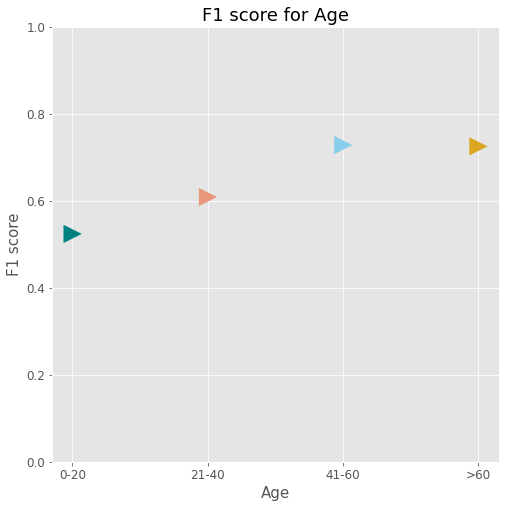

In [ ]:
# scatter plot of F1 vs age group
plt.figure(figsize=(8, 8))
plt.ylim(0,1.0)
plt.scatter(ages, age_f1, c=["teal", "darksalmon", "skyblue","goldenrod"], marker=">", s=300)
plt.title("F1 score for Age", fontsize=18)
plt.xlabel("Age", fontsize=15)
plt.ylabel("F1 score", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

## Precision: Age

Text(0, 0.5, 'Precision')

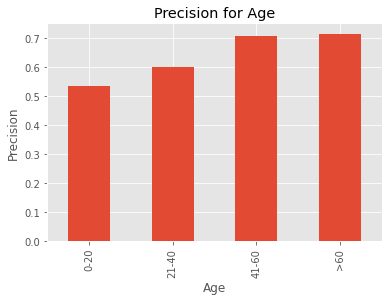

In [ ]:
age_precision = []
for ind_list in age_report:
    age_precision.append(ind_list[0])

# type(age)
precision_age_combo = list(zip(ages, age_precision))

df = pd.DataFrame(precision_age_combo, columns = ['ages', 'age_precision'])

df.plot(
    x="ages", y="age_precision", kind="bar", legend=False
)
plt.title("Precision for Age")
plt.xlabel("Age")
plt.ylabel("Precision")

## Recall: Age

Text(0, 0.5, 'Recall')

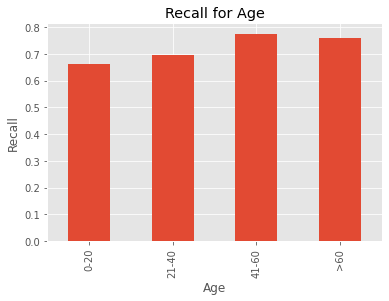

In [ ]:
age_recall = []
for ind_list in age_report:
    age_recall.append(ind_list[1])

recall_age_combo = list(zip(ages, age_recall))

df = pd.DataFrame(recall_age_combo, columns = ['ages', 'age_recall'])

df.plot(
    x="ages", y="age_recall", kind="bar", legend=False
)
plt.title("Recall for Age")
plt.xlabel("Age")
plt.ylabel("Recall")

## Spearman's rank correlation coefficient: Age

In [ ]:
age_count = train_metadata["age_group"].value_counts()
ages = ['0-20','21-40', '41-60', '>60']
age_count = [age_count[group] for group in ages]
age_count

print("age count" ,age_count)
print("bal_acc ", age_bal_acc)
print("f1 ", age_f1)
print("precision ", age_precision)
print("recall ", age_recall)


# age_bal_acc
#age_count = list(age_count.sort_index().values)

# age_bal_acc = [x for x in age_bal_acc if str(x) != 'nan']
# age_f1 = [x for x in age_f1 if str(x) != 'nan']
# age_precision = [x for x in age_precision if str(x) != 'nan']
# age_recall = [x for x in age_recall if str(x) != 'nan']


age_bal_acc_correl = stats.spearmanr(age_count, age_bal_acc)
print("The SRCC for balanced accuracy vs age count is ", age_bal_acc_correl)

age_f1_correl = stats.spearmanr(age_count, age_f1)
print("The SRCC for f1 score vs age count is ", age_f1_correl)

age_precision_correl = stats.spearmanr(age_count, age_precision)
print("The SRCC for precision vs age count is ", age_precision_correl)

age_recall_correl = stats.spearmanr(age_count, age_recall)
print("The SRCC for recall vs age count is ", age_recall_correl)

age_srcc = [age_bal_acc_correl, age_f1_correl, age_precision_correl, age_recall_correl]
age_array = np.array(age_srcc)
age_table = DataFrame(age_array, index = ["BA", "F1", "P", "R"], columns=["SRCC", "p-value"])
print(age_table)

scores = [age_bal_acc, age_f1, age_precision, age_recall]
score_array = np.array(scores)
score_array = np.transpose(score_array)
age_count_scores = DataFrame(score_array, index = ages, columns = ["BA", "F1", "P", "R"])
age_count_scores
age_count_scores['count'] = np.array(age_count)

print(age_count_scores)

age count [841, 4659, 7455, 6966]
bal_acc  [0.661504424778761, 0.695915009300329, 0.7753936234781678, 0.7584565975975048]
f1  [0.5240384615384615, 0.6088657105606258, 0.7282851915004503, 0.7254010270161931]
precision  [0.5349282296650718, 0.5992012461284889, 0.7053729515289482, 0.7140694057947291]
recall  [0.661504424778761, 0.695915009300329, 0.7753936234781678, 0.7584565975975048]
The SRCC for balanced accuracy vs age count is  SpearmanrResult(correlation=1.0, pvalue=0.0)
The SRCC for f1 score vs age count is  SpearmanrResult(correlation=1.0, pvalue=0.0)
The SRCC for precision vs age count is  SpearmanrResult(correlation=0.7999999999999999, pvalue=0.20000000000000007)
The SRCC for recall vs age count is  SpearmanrResult(correlation=1.0, pvalue=0.0)
    SRCC  p-value
BA   1.0      0.0
F1   1.0      0.0
P    0.8      0.2
R    1.0      0.0
             BA        F1         P         R  count
0-20   0.661504  0.524038  0.534928  0.661504    841
21-40  0.695915  0.608866  0.599201  0.6959

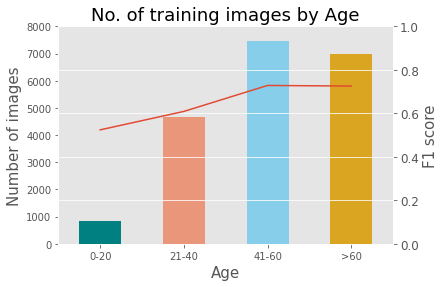

In [ ]:
# age_count_df = pd.DataFrame(age_count, index = ages, columns=["count"])
# age_count_df['ages'] = age_count_df.index

# ax = age_count_df.plot(x='ages', y='count', color=["teal", "darksalmon", "skyblue","goldenrod"], kind="bar", legend=False)
# # plt.plot(age_count_df.skin_age.values, age_count_df["count"].values, color=age_count_df.skin_age.values)
# ax2 = age_count_scores["F1"].plot(secondary_y=True)

# plt.title("No. of training images by Age", fontsize=18)
# ax.set_xlabel("Age", fontsize=15)
# ax.set_ylabel("Number of images", fontsize=15)
# ax2.set_ylabel("F1 score", fontsize=15)
# ax2.set_ylim(0,1.0)
# ax.set_ylim(top=8000)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.tick_params(axis='both', which='minor', labelsize=12)

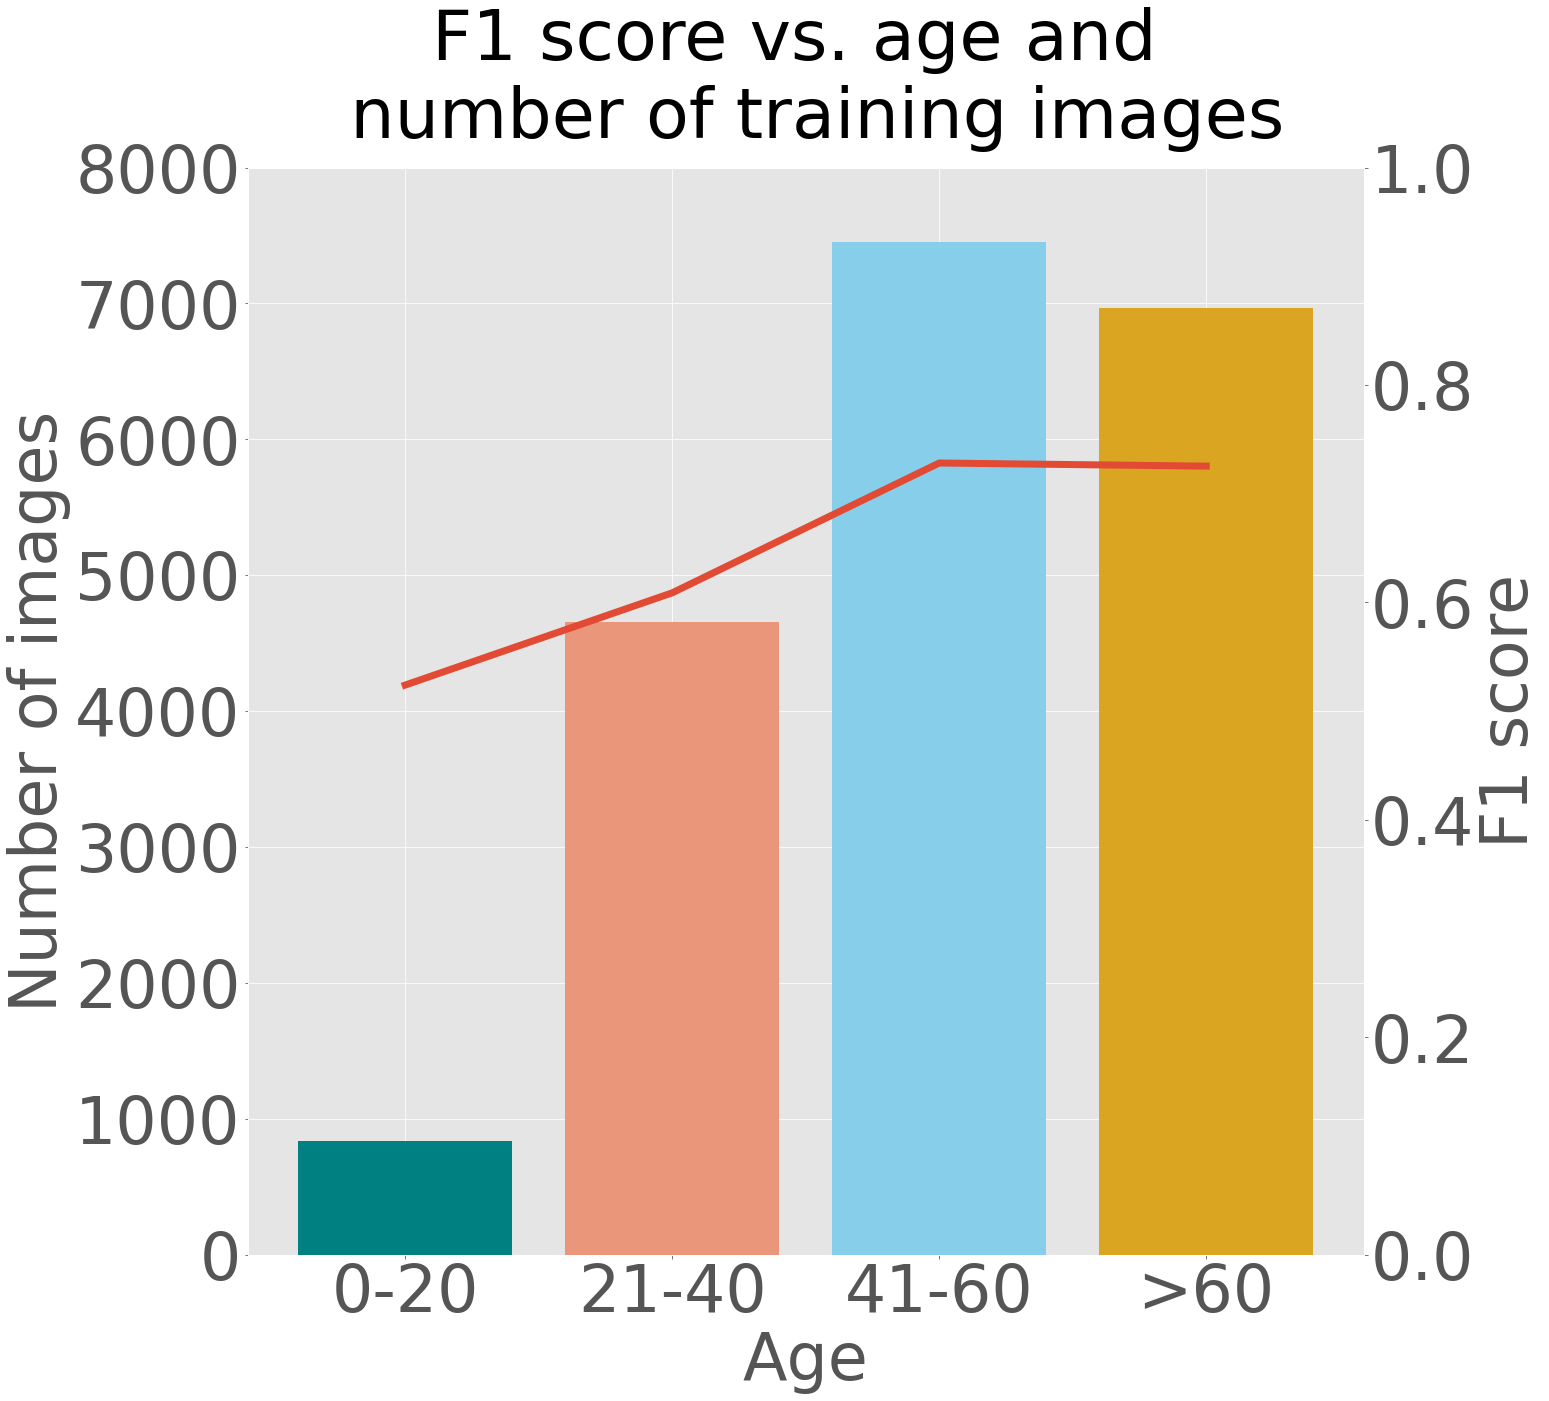

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.bar(x=age_count_df.ages, height=age_count_df["count"], color=["teal", "darksalmon", "skyblue","goldenrod"])
ax2 = ax.twinx()
# ax2.plot(age_count_df.ages, age_count_df.F1)
ax2.plot(age_count_df["ages"], age_count_scores["F1"], linewidth=7)
ax.set_title("F1 score vs. age and \n number of training images", fontsize=70, pad=30)
ax.set_xlabel("Age", fontsize=65)
ax.set_ylabel("Number of images", fontsize=65)
ax2.set_ylabel("F1 score", fontsize=65)
ax.tick_params(axis='both', which='major', labelsize=65)
ax.tick_params(axis='both', which='minor', labelsize=65)
ax2.tick_params(axis='both', which='major', labelsize=65)
ax2.tick_params(axis='both', which='minor', labelsize=65)
ax2.set_ylim(0,1.0)
ax.set_ylim(top=8000)
ax2.grid(None)

# Anatomical Skin Leison Location

In [ ]:
locations = list(test_results_metadata["anatom_site_general"].unique())
locations = [x for x in locations if str(x) != 'nan']

# print(locations)
location_report = []
location_bal_acc = []

for location in locations:
    df = (test_results_metadata.loc[test_results_metadata["anatom_site_general"] == location])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    location_bal_acc.append(bal_acc)

# print(location_bal_acc)
location_bal_acc = pd.Series(data=location_bal_acc, index=locations).sort_index()


for location in locations:
    df = (test_results_metadata.loc[test_results_metadata["anatom_site_general"] == location])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    location_report.append(metric_report)

# print(location_report)

location_report = pd.Series(data=location_report, index=locations).sort_index()


## Balanced Accuracy: Skin Leison Location

Text(0, 0.5, 'Balanced Accuracy')

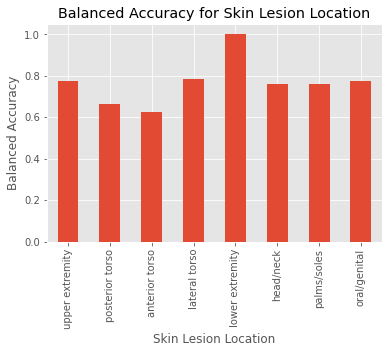

In [ ]:
location_chart = list(zip(locations, location_bal_acc))
df = pd.DataFrame(location_chart, columns = ['locations', 'location_bal_acc'])

df.plot(
    x="locations", y="location_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("Balanced Accuracy")

## F1 score: Skin Leison Location

Text(0, 0.5, 'F1 score')

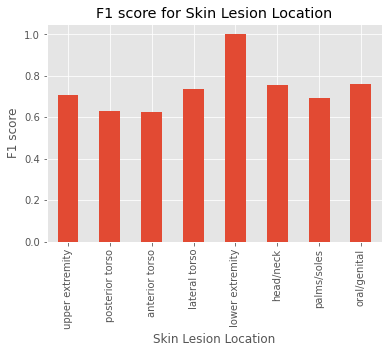

In [ ]:
location_f1 = []
for ind_list in location_report:
    location_f1.append(ind_list[2])

f1_location_combo = list(zip(locations, location_f1))

df = pd.DataFrame(f1_location_combo, columns = ['locations', 'location_f1'])

df.plot(
    x="locations", y="location_f1", kind="bar", legend=False
)
plt.title("F1 score for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("F1 score")

## Precision: Skin Lesion Location

Text(0, 0.5, 'Precision')

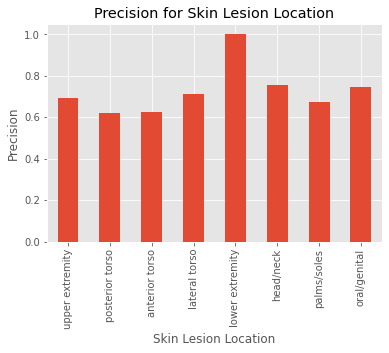

In [ ]:
location_precision = []
for ind_list in location_report:
    location_precision.append(ind_list[0])

# type(age)
precision_location_combo = list(zip(locations, location_precision))

df = pd.DataFrame(precision_location_combo, columns = ['locations', 'location_precision'])

df.plot(
    x="locations", y="location_precision", kind="bar", legend=False
)
plt.title("Precision for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("Precision")

## Recall: Skin Lesion Location

[('upper extremity', 0.775913697286695), ('posterior torso', 0.6634953716234504), ('anterior torso', 0.625), ('lateral torso', 0.7840100866416656), ('lower extremity', 1.0), ('head/neck', 0.7612781954887218), ('palms/soles', 0.7608108108108108), ('oral/genital', 0.7765741367637102)]


Text(0, 0.5, 'Recall')

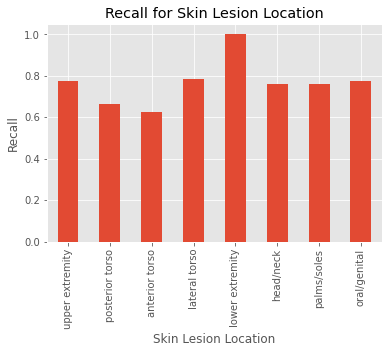

In [ ]:
location_recall = []
for ind_list in location_report:
    location_recall.append(ind_list[1])

# type(skin_tones)
recall_location_combo = list(zip(locations, location_recall))

print(recall_location_combo)

df = pd.DataFrame(recall_location_combo, columns = ['locations', 'location_recall'])

df.plot(
    x="locations", y="location_recall", kind="bar", legend=False
)
plt.title("Recall for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("Recall")

## Spearman's rank correlation coefficient: Skin Lesion Location

In [ ]:
location_count = train_metadata["anatom_site_general"].value_counts()
locations = ['upper extremity', 'posterior torso', 'anterior torso', 'lateral torso', 'lower extremity', 'head/neck', 'palms/soles', 'oral/genital']
location_count = [location_count[group] for group in locations]

location_bal_acc_correl = stats.spearmanr(location_count, location_bal_acc)
print("The SRCC for balanced accuracy vs location count is ", location_bal_acc_correl)

location_f1_correl = stats.spearmanr(location_count, location_f1)
print("The SRCC for f1 score vs location count is ", location_f1_correl)

location_precision_correl = stats.spearmanr(location_count, location_precision)
print("The SRCC for precision vs location count is ", location_precision_correl)

location_recall_correl = stats.spearmanr(location_count, location_recall)
print("The SRCC for recall vs location count is ", location_recall_correl)

location_srcc = [location_bal_acc_correl, location_f1_correl, location_precision_correl, location_recall_correl]
location_array = np.array(location_srcc)
location_table = DataFrame(location_array, index = ["BA", "F1", "P", "R"], columns=["SRCC", "p-value"])
print(location_table)

location_scores = [location_bal_acc, location_f1, location_precision, location_recall]
score_array = np.array(location_scores)
score_array = np.transpose(score_array)
location_count_scores = DataFrame(score_array, index = locations, columns = ["BA", "F1", "P", "R"])
location_count_scores
location_count_scores['count'] = np.array(location_count)

print(location_count_scores)

The SRCC for balanced accuracy vs location count is  SpearmanrResult(correlation=-0.30952380952380953, pvalue=0.4556448907375822)
The SRCC for f1 score vs location count is  SpearmanrResult(correlation=-0.14285714285714288, pvalue=0.735764859879812)
The SRCC for precision vs location count is  SpearmanrResult(correlation=0.04761904761904763, pvalue=0.9108491685195836)
The SRCC for recall vs location count is  SpearmanrResult(correlation=-0.30952380952380953, pvalue=0.4556448907375822)
        SRCC   p-value
BA -0.309524  0.455645
F1 -0.142857  0.735765
P   0.047619  0.910849
R  -0.309524  0.455645
                       BA        F1         P         R  count
upper extremity  0.775914  0.707872  0.691497  0.775914   2315
posterior torso  0.663495  0.629094  0.622610  0.663495   2247
anterior torso   0.625000  0.625000  0.625000  0.625000   5555
lateral torso    0.784010  0.735820  0.711422  0.784010     43
lower extremity  1.000000  1.000000  1.000000  1.000000   3977
head/neck        

# Gender II: 10,000: 2,000 Manipulating training test set to create deeper bias 

In [ ]:
gender_bias_results = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/skin_lesion_part_2_models/2022-06-28_15-48-41.526115/each_image_predictions.csv')
gender_bias_results

,Unnamed: 0,predicted,actual,image_path
0,0,1,0,/content/drive/MyDrive/Dissertation/skin_lesio...
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
3,3,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
4,4,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
...,...,...,...,...
2529,2529,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2530,2530,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2531,2531,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2532,2532,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...


In [ ]:
gender_bias_results["image_id"] = [None]*len(gender_bias_results)
for index, row in gender_bias_results.iterrows():
    image_path = row.image_path
    image_id = image_path.split("/")[-1].split(".")[0]
    gender_bias_results.loc[gender_bias_results["image_path"] == image_path, 'image'] = image_id

gender_bias_results

,Unnamed: 0,predicted,actual,image_path,image_id,image
0,0,1,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000004
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000159
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000160
3,3,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000167
4,4,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000173
...,...,...,...,...,...,...
2529,2529,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073128
2530,2530,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073146
2531,2531,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073155
2532,2532,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073199


In [ ]:
binary_meta_data = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/mel_vs_nonmel.csv')

In [ ]:
gender_bias_test_results_metadata = pd.merge(binary_meta_data, gender_bias_results, on='image')
gender_bias_test_results_metadata = gender_bias_test_results_metadata.drop(columns="Unnamed: 0")
gender_bias_test_results_metadata

,image,age_approx,anatom_site_general,lesion_id,sex,image_path_x,rand_split,fitzpatrick,brisque,class,age_group,predicted,actual,image_path_y,image_id
0,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NON_MEL,21-40,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
1,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL,>60,1,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2,ISIC_0000016,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,58.896179,NON_MEL,41-60,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
3,ISIC_0000032_downsampled,30.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,29.356628,NON_MEL,21-40,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
4,ISIC_0000038_downsampled,40.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,31.350281,NON_MEL,21-40,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,ISIC_0073155,85.0,anterior torso,BCN_0001306,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,3.0,22.387878,NON_MEL,>60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2530,ISIC_0073173,80.0,palms/soles,BCN_0002989,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,24.988464,MEL,>60,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2531,ISIC_0073199,45.0,palms/soles,BCN_0000077,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,40.690613,NON_MEL,41-60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2532,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,14.193542,NON_MEL,>60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None


In [ ]:
from pandas.core.frame import DataFrame
# precision_recall_fscore_support where suport = None in our case as we are doing average 
bias_gender_report = []
bias_gender_bal_acc = []

genders = ["male", "female"]

for gender in genders:
    df = (gender_bias_test_results_metadata.loc[gender_bias_test_results_metadata["sex"] == gender])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    bias_gender_bal_acc.append(bal_acc)

print(bias_gender_bal_acc)


for gender in genders:
    df = (gender_bias_test_results_metadata.loc[gender_bias_test_results_metadata["sex"] == gender])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    bias_gender_report.append(metric_report)

print(bias_gender_report)

[0.753835262134456, 0.7398291925465839]
[(0.6766713970356354, 0.753835262134456, 0.6919207934279584, None), (0.6547140453039855, 0.7398291925465839, 0.665712322042219, None)]


## Balanced Accurary: Bias Gender (10,000:2,000)

Text(0, 0.5, 'Balanced Accuracy')

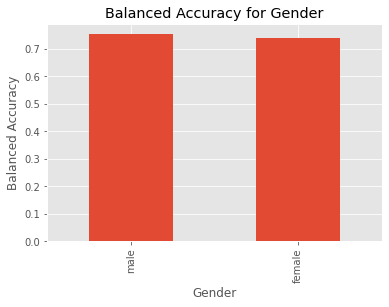

In [ ]:
bias_bal_acc_combo = list(zip(genders, bias_gender_bal_acc))
df = pd.DataFrame(bias_bal_acc_combo, columns = ['gender', 'balanced_accuracy'])

df.plot(
    x="gender", y="balanced_accuracy", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Gender")
plt.xlabel("Gender")
plt.ylabel("Balanced Accuracy")

## F1 score: Bias Gender (10,000:2,000)

Text(0, 0.5, 'F1 score')

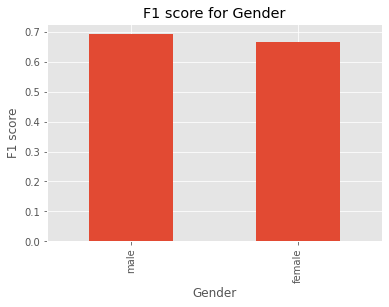

In [ ]:
bias_gender_f1 = []
for ind_list in bias_gender_report:
    bias_gender_f1.append(ind_list[2])

# type(genders)
bias_f1_combo = list(zip(genders, bias_gender_f1))

df = pd.DataFrame(bias_f1_combo, columns = ['gender', 'bias_gender_f1'])

df.plot(
    x="gender", y="bias_gender_f1", kind="bar", legend=False
)
plt.title("F1 score for Gender")
plt.xlabel("Gender")
plt.ylabel("F1 score")

## Precision: Bias Gender (10,000:2,000)

Text(0, 0.5, 'Precision')

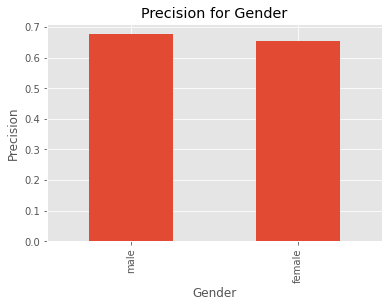

In [ ]:
bias_gender_precision = []
for ind_list in bias_gender_report:
    bias_gender_precision.append(ind_list[0])

# type(genders)
bias_f1_combo = list(zip(genders, bias_gender_precision))

df = pd.DataFrame(bias_f1_combo, columns = ['gender', 'bias_gender_precision'])

df.plot(
    x="gender", y="bias_gender_precision", kind="bar", legend=False
)
plt.title("Precision for Gender")
plt.xlabel("Gender")
plt.ylabel("Precision")

## Recall: Bias Gender (10,000:2,000)

Text(0, 0.5, 'Recall')

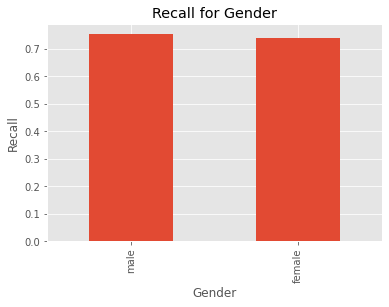

In [ ]:
bias_gender_recall = []
for ind_list in bias_gender_report:
    bias_gender_recall.append(ind_list[1])

# type(genders)
bias_f1_combo = list(zip(genders, bias_gender_recall))

df = pd.DataFrame(bias_f1_combo, columns = ['gender', 'bias_gender_recall'])

df.plot(
    x="gender", y="bias_gender_recall", kind="bar", legend=False
)
plt.title("Recall for Gender")
plt.xlabel("Gender")
plt.ylabel("Recall")

## Summary of metric scores for Gender (10,000:2,000)

In [ ]:
sex_count = [10000, 2000]
sex_count

gender_scores = [bias_gender_bal_acc, bias_gender_f1, bias_gender_precision, bias_gender_recall]
score_array = np.array(gender_scores)
score_array = np.transpose(score_array)
bias_gender_count_scores = DataFrame(score_array, index = genders, columns = ["BA", "F1", "P", "R"])
bias_gender_count_scores
bias_gender_count_scores['train_set_count'] = np.array(sex_count)

print(bias_gender_count_scores)

              BA        F1         P         R  train_set_count
male    0.753835  0.691921  0.676671  0.753835            10000
female  0.739829  0.665712  0.654714  0.739829             2000


## Chi squared test

In [ ]:
# to make an extra "correct" column to calc correct (1) or incorrect (0)

conditions = [
              (gender_bias_test_results_metadata['actual'] == gender_bias_test_results_metadata['predicted']),
              (gender_bias_test_results_metadata['actual'] != gender_bias_test_results_metadata['predicted'])
]

values = [1, 0]

gender_bias_test_results_metadata['correct'] = np.select(conditions, values, default=None)

gender_bias_test_results_metadata

# gender_bias_test_results_metadata.to_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/chi_squ_metadata.csv', index=False)


In [ ]:
male_bias_test = gender_bias_test_results_metadata.groupby(["sex", "correct"])["sex"].count()
male_bias_test.to_frame()
print(male_bias_test)


tab_data = [[307, 1019], [292, 874]]
chi2_contingency(tab_data)

sex     correct
female  0           292
        1           874
male    0           307
        1          1019
Name: sex, dtype: int64


(1.113135699833363,
 0.2914013313646373,
 1,
 array([[ 318.72953451, 1007.27046549],
        [ 280.27046549,  885.72953451]]))

# Gender III: 6,000:6,000 Balanced train set

In [ ]:
gender_balanced_results = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/skin_lesion_part_2_models/2022-06-28_18-26-31.230005/each_image_predictions.csv')
gender_balanced_results

,Unnamed: 0,predicted,actual,image_path
0,0,1,0,/content/drive/MyDrive/Dissertation/skin_lesio...
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
3,3,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
4,4,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
...,...,...,...,...
2529,2529,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2530,2530,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2531,2531,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...
2532,2532,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...


In [ ]:
gender_balanced_results["image_id"] = [None]*len(gender_balanced_results)
for index, row in gender_balanced_results.iterrows():
    image_path = row.image_path
    image_id = image_path.split("/")[-1].split(".")[0]
    gender_balanced_results.loc[gender_balanced_results["image_path"] == image_path, 'image'] = image_id

gender_balanced_results

,Unnamed: 0,predicted,actual,image_path,image_id,image
0,0,1,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000004
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000159
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000160
3,3,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000167
4,4,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0000173
...,...,...,...,...,...,...
2529,2529,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073128
2530,2530,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073146
2531,2531,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073155
2532,2532,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None,ISIC_0073199


In [ ]:
gender_balanced_test_results_metadata = pd.merge(binary_meta_data, gender_balanced_results, on='image')
gender_balanced_test_results_metadata = gender_balanced_test_results_metadata.drop(columns="Unnamed: 0")
gender_balanced_test_results_metadata

,image,age_approx,anatom_site_general,lesion_id,sex,image_path_x,rand_split,fitzpatrick,brisque,class,age_group,predicted,actual,image_path_y,image_id
0,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NON_MEL,21-40,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
1,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL,>60,1,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2,ISIC_0000016,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,58.896179,NON_MEL,41-60,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
3,ISIC_0000032_downsampled,30.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,29.356628,NON_MEL,21-40,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
4,ISIC_0000038_downsampled,40.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,31.350281,NON_MEL,21-40,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,ISIC_0073155,85.0,anterior torso,BCN_0001306,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,3.0,22.387878,NON_MEL,>60,0,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2530,ISIC_0073173,80.0,palms/soles,BCN_0002989,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,24.988464,MEL,>60,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2531,ISIC_0073199,45.0,palms/soles,BCN_0000077,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,40.690613,NON_MEL,41-60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None
2532,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,14.193542,NON_MEL,>60,1,1,/content/drive/MyDrive/Dissertation/skin_lesio...,None


In [ ]:
from pandas.core.frame import DataFrame
# precision_recall_fscore_support where suport = None in our case as we are doing average 
balanced_gender_report = []
balanced_gender_bal_acc = []

genders = ["male", "female"]

for gender in genders:
    df = (gender_balanced_test_results_metadata.loc[gender_balanced_test_results_metadata["sex"] == gender])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    balanced_gender_bal_acc.append(bal_acc)

print(balanced_gender_bal_acc)


for gender in genders:
    df = (gender_balanced_test_results_metadata.loc[gender_balanced_test_results_metadata["sex"] == gender])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    balanced_gender_report.append(metric_report)

print(balanced_gender_report)

[0.7576450376635391, 0.7485403726708074]
[(0.6775388714276793, 0.7576450376635391, 0.6923611742013279, None), (0.6628032345013477, 0.7485403726708074, 0.6764754144824972, None)]


## Balanced Accurary: Balanced Gender (6,000:6,000)

Text(0, 0.5, 'Balanced Accuracy')

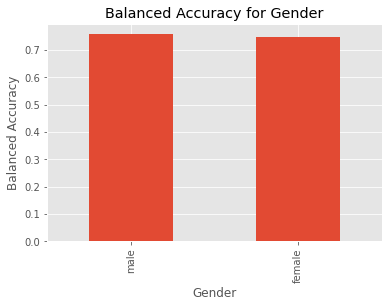

In [ ]:
balanced_bal_acc_combo = list(zip(genders, balanced_gender_bal_acc))
df = pd.DataFrame(balanced_bal_acc_combo, columns = ['gender', 'balanced_accuracy'])

df.plot(
    x="gender", y="balanced_accuracy", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Gender")
plt.xlabel("Gender")
plt.ylabel("Balanced Accuracy")

## F1 score: Balanced Gender (6,000:6,000)

Text(0, 0.5, 'F1 score')

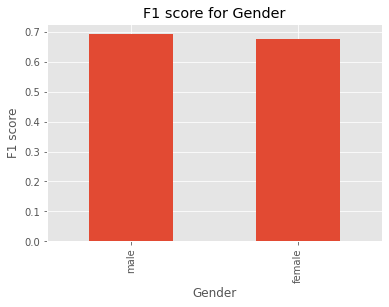

In [ ]:
balanced_gender_f1 = []
for ind_list in balanced_gender_report:
    balanced_gender_f1.append(ind_list[2])

# type(genders)
balanced_f1_combo = list(zip(genders, balanced_gender_f1))

df = pd.DataFrame(balanced_f1_combo, columns = ['gender', 'balanced_gender_f1'])

df.plot(
    x="gender", y="balanced_gender_f1", kind="bar", legend=False
)
plt.title("F1 score for Gender")
plt.xlabel("Gender")
plt.ylabel("F1 score")

## Precision: Balanced Gender (6,000:6,000)

Text(0, 0.5, 'Precision')

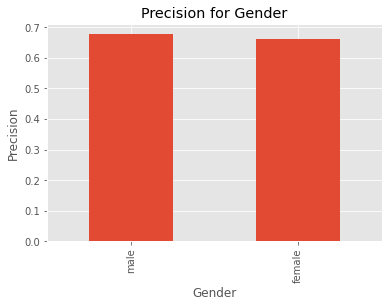

In [ ]:
balanced_gender_precision = []
for ind_list in balanced_gender_report:
    balanced_gender_precision.append(ind_list[0])

# type(genders)
balanced_f1_combo = list(zip(genders, balanced_gender_precision))

df = pd.DataFrame(balanced_f1_combo, columns = ['gender', 'balanced_gender_precision'])

df.plot(
    x="gender", y="balanced_gender_precision", kind="bar", legend=False
)
plt.title("Precision for Gender")
plt.xlabel("Gender")
plt.ylabel("Precision")

## Recall: Balanced Gender (6,000:6,000)

Text(0, 0.5, 'Recall')

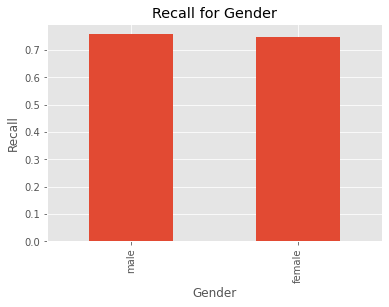

In [ ]:
balanced_gender_recall = []
for ind_list in balanced_gender_report:
    balanced_gender_recall.append(ind_list[1])

# type(genders)
balanced_f1_combo = list(zip(genders, balanced_gender_recall))

df = pd.DataFrame(balanced_f1_combo, columns = ['gender', 'balanced_gender_recall'])

df.plot(
    x="gender", y="balanced_gender_recall", kind="bar", legend=False
)
plt.title("Recall for Gender")
plt.xlabel("Gender")
plt.ylabel("Recall")

## Summary of metric scores for Gender (6,000:6,000)

In [ ]:
sex_count = [6000, 6000]
sex_count

gender_scores = [balanced_gender_bal_acc, balanced_gender_f1, balanced_gender_precision, balanced_gender_recall]
score_array = np.array(gender_scores)
score_array = np.transpose(score_array)
balanced_gender_count_scores = DataFrame(score_array, index = genders, columns = ["BA", "F1", "P", "R"])
balanced_gender_count_scores
balanced_gender_count_scores['train_images_count'] = np.array(sex_count)

print(balanced_gender_count_scores)

              BA        F1         P         R  train_images_count
male    0.757645  0.692361  0.677539  0.757645                6000
female  0.748540  0.676475  0.662803  0.748540                6000


In [ ]:
print("These are the scores for the 10,000:2,000 bias train set... ")
print(bias_gender_count_scores)
print("These are the scores for the 6,000:6,000 balanced train set... ")
print(balanced_gender_count_scores)


These are the scores for the 10,000:2,000 bias train set... 
              BA        F1         P         R  train_set_count
male    0.753835  0.691921  0.676671  0.753835            10000
female  0.739829  0.665712  0.654714  0.739829             2000
These are the scores for the 6,000:6,000 balanced train set... 
              BA        F1         P         R  train_images_count
male    0.757645  0.692361  0.677539  0.757645                6000
female  0.748540  0.676475  0.662803  0.748540                6000


## Chi-sqaured test

In [ ]:
# to make an extra "correct" column to calc correct (1) or incorrect (0)

conditions = [
              (gender_balanced_test_results_metadata['actual'] == gender_balanced_test_results_metadata['predicted']),
              (gender_balanced_test_results_metadata['actual'] != gender_balanced_test_results_metadata['predicted'])
]

values = [1, 0]

gender_balanced_test_results_metadata['correct'] = np.select(conditions, values, default=None)

gender_balanced_test_results_metadata

# gender_balanced_test_results_metadata.to_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/chi_squ_metadata_balanced.csv', index=False)

In [ ]:
gender_balanced_test = gender_balanced_test_results_metadata.groupby(["sex", "correct"])["sex"].count()
gender_balanced_test.to_frame()
print(gender_balanced_test)

tab_data = [[309, 1017], [279, 887]]
chi2_contingency(tab_data)

sex     correct
female  0           279
        1           887
male    0           309
        1          1017
Name: sex, dtype: int64


(0.10192171170577477,
 0.7495355797993344,
 1,
 array([[ 312.87640449, 1013.12359551],
        [ 275.12359551,  890.87640449]]))